In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
df = df.loc[:,['STATE/UT','DISTRICT','YEAR','KIDNAPPING & ABDUCTION']]

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,KIDNAPPING & ABDUCTION
0,ANDHRA PRADESH,ADILABAD,2001,46
1,ANDHRA PRADESH,ANANTAPUR,2001,53
2,ANDHRA PRADESH,CHITTOOR,2001,59
3,ANDHRA PRADESH,CUDDAPAH,2001,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,49


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['STATE/UT'])
df['STATE/UT'] = le.transform(df['STATE/UT'])

In [ ]:
le2 = LabelEncoder()
le2.fit(df['DISTRICT'])
df['DISTRICT'] = le2.transform(df['DISTRICT'])

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,KIDNAPPING & ABDUCTION
0,1,3,2001,46
1,1,28,2001,53
2,1,154,2001,59
3,1,172,2001,25
4,1,220,2001,49


In [ ]:
X = df.iloc[:,0:3]
y = df['KIDNAPPING & ABDUCTION']

In [ ]:
X.head()

,STATE/UT,DISTRICT,YEAR
0,1,3,2001
1,1,28,2001
2,1,154,2001
3,1,172,2001
4,1,220,2001


In [ ]:
y.head()

0    46
1    53
2    59
3    25
4    49
Name: KIDNAPPING & ABDUCTION, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)
train_score = r2_score(y_train,y_pred_train)
test_score= r2_score(y_test,y_pred_test)

In [ ]:
train_score

0.9913690613983221

In [ ]:
test_score

0.9598716253150871

In [ ]:
df.sample()

,STATE/UT,DISTRICT,YEAR,KIDNAPPING & ABDUCTION
374,20,522,2001,23


In [ ]:
x = [25,596,2009]
y = model.predict([np.array(x)])
y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([40.58])

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('f_kidnappingmodel.pkl','wb'))
from google.colab import files
files.download('f_kidnappingmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [ ]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
state_data = data[data['DISTRICT']=='TOTAL']

In [ ]:
state_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
42,ARUNACHAL PRADESH,TOTAL,2001,83,53,3,33,0,33,83,...,13,466,0,78,3,11,0,0,618,2342
70,ASSAM,TOTAL,2001,1356,481,40,817,0,817,1480,...,441,5805,59,850,4,1248,0,2010,9315,36877
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,502,7544,859,562,21,1558,83,2406,36667,88432
135,CHHATTISGARH,TOTAL,2001,880,529,45,959,0,959,207,...,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,CHANDIGARH,TOTAL,2012,21,44,5,27,0,27,87,...,9,42,5,45,25,73,0,3,1042,3606
8990,D & N HAVELI,TOTAL,2012,7,2,0,3,0,3,13,...,12,25,0,2,0,0,0,23,112,318
8993,DAMAN & DIU,TOTAL,2012,3,5,0,5,0,5,3,...,11,17,0,0,0,3,0,38,46,239
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


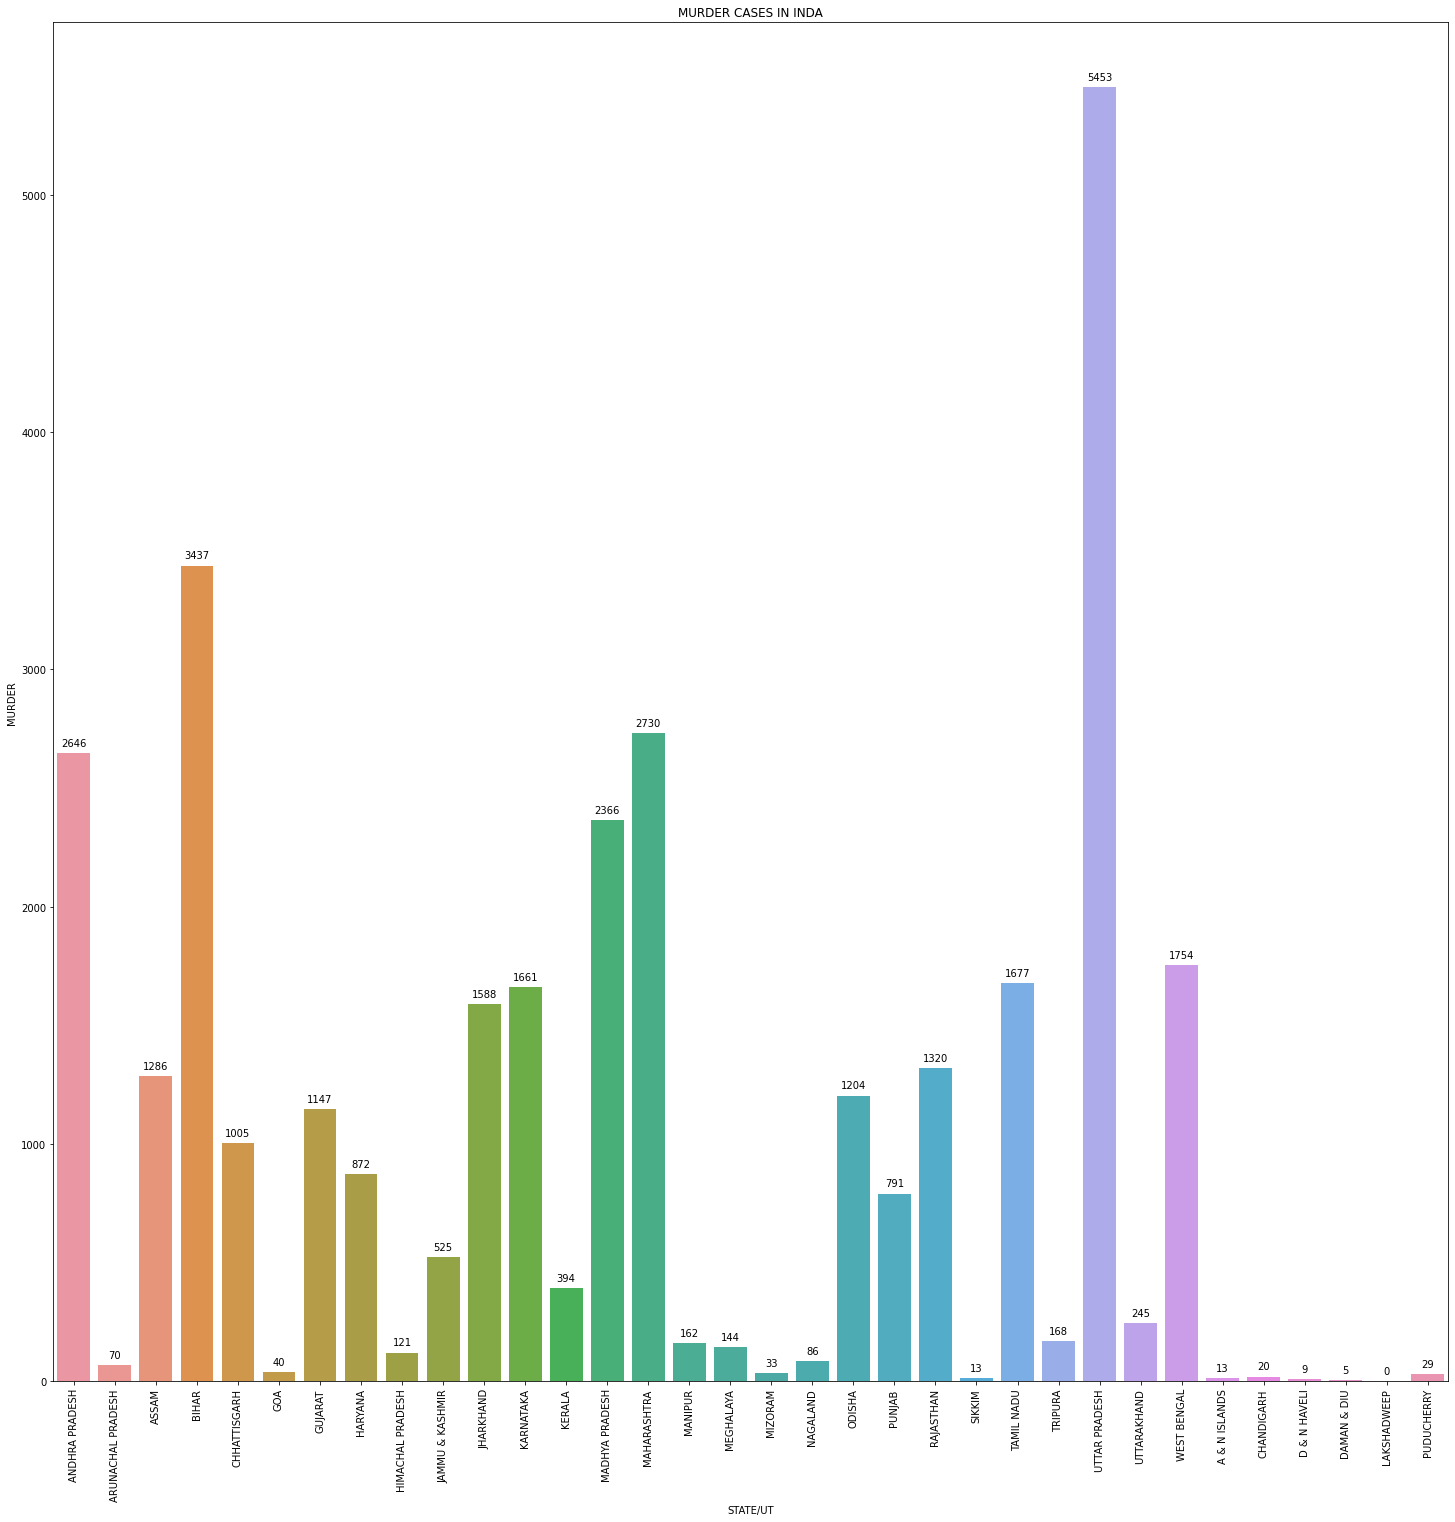

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
plt.title('MURDER CASES IN INDA')
splot = sns.barplot(x = 'STATE/UT',y='MURDER',data = state_data,ci=None)
for p in splot.patches:
  splot.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


([<matplotlib.patches.Wedge at 0x7fdf8fced550>,
 [Text(1.099766046165032, 0.022685759906439007, 'ANDHRA PRADESH'),
  Text(1.099034202585547, 0.0460849383980396, 'ARUNACHAL PRADESH'),
  Text(1.0984370616780592, 0.058617587224927395, 'ASSAM'),
  Text(1.0952527283721727, 0.10208555722192904, 'BIHAR'),
  Text(1.090889746771086, 0.14127830827737028, 'CHHATTISGARH'),
  Text(1.089835219047232, 0.14919515851485224, 'GOA'),
  Text(1.0882882719645066, 0.16008946593860726, 'GUJARAT'),
  Text(1.0856038719490304, 0.17738160335636127, 'HARYANA'),
  Text(1.0843108367011693, 0.18512160709223047, 'HIMACHAL PRADESH'),
  Text(1.0825102543272676, 0.19537540601701786, 'JAMMU & KASHMIR'),
  Text(1.078285203505595, 0.21748797645133822, 'JHARKHAND'),
  Text(1.0725522049080338, 0.24419616652788637, 'KARNATAKA'),
  Text(1.068343128667142, 0.26199801417129626, 'KERALA'),
  Text(1.0620456800236964, 0.286459375030744, 'MADHYA PRADESH'),
  Text(1.049172149337556, 0.3305114234855026, 'MAHARASHTRA'),
  Text(1.0408815

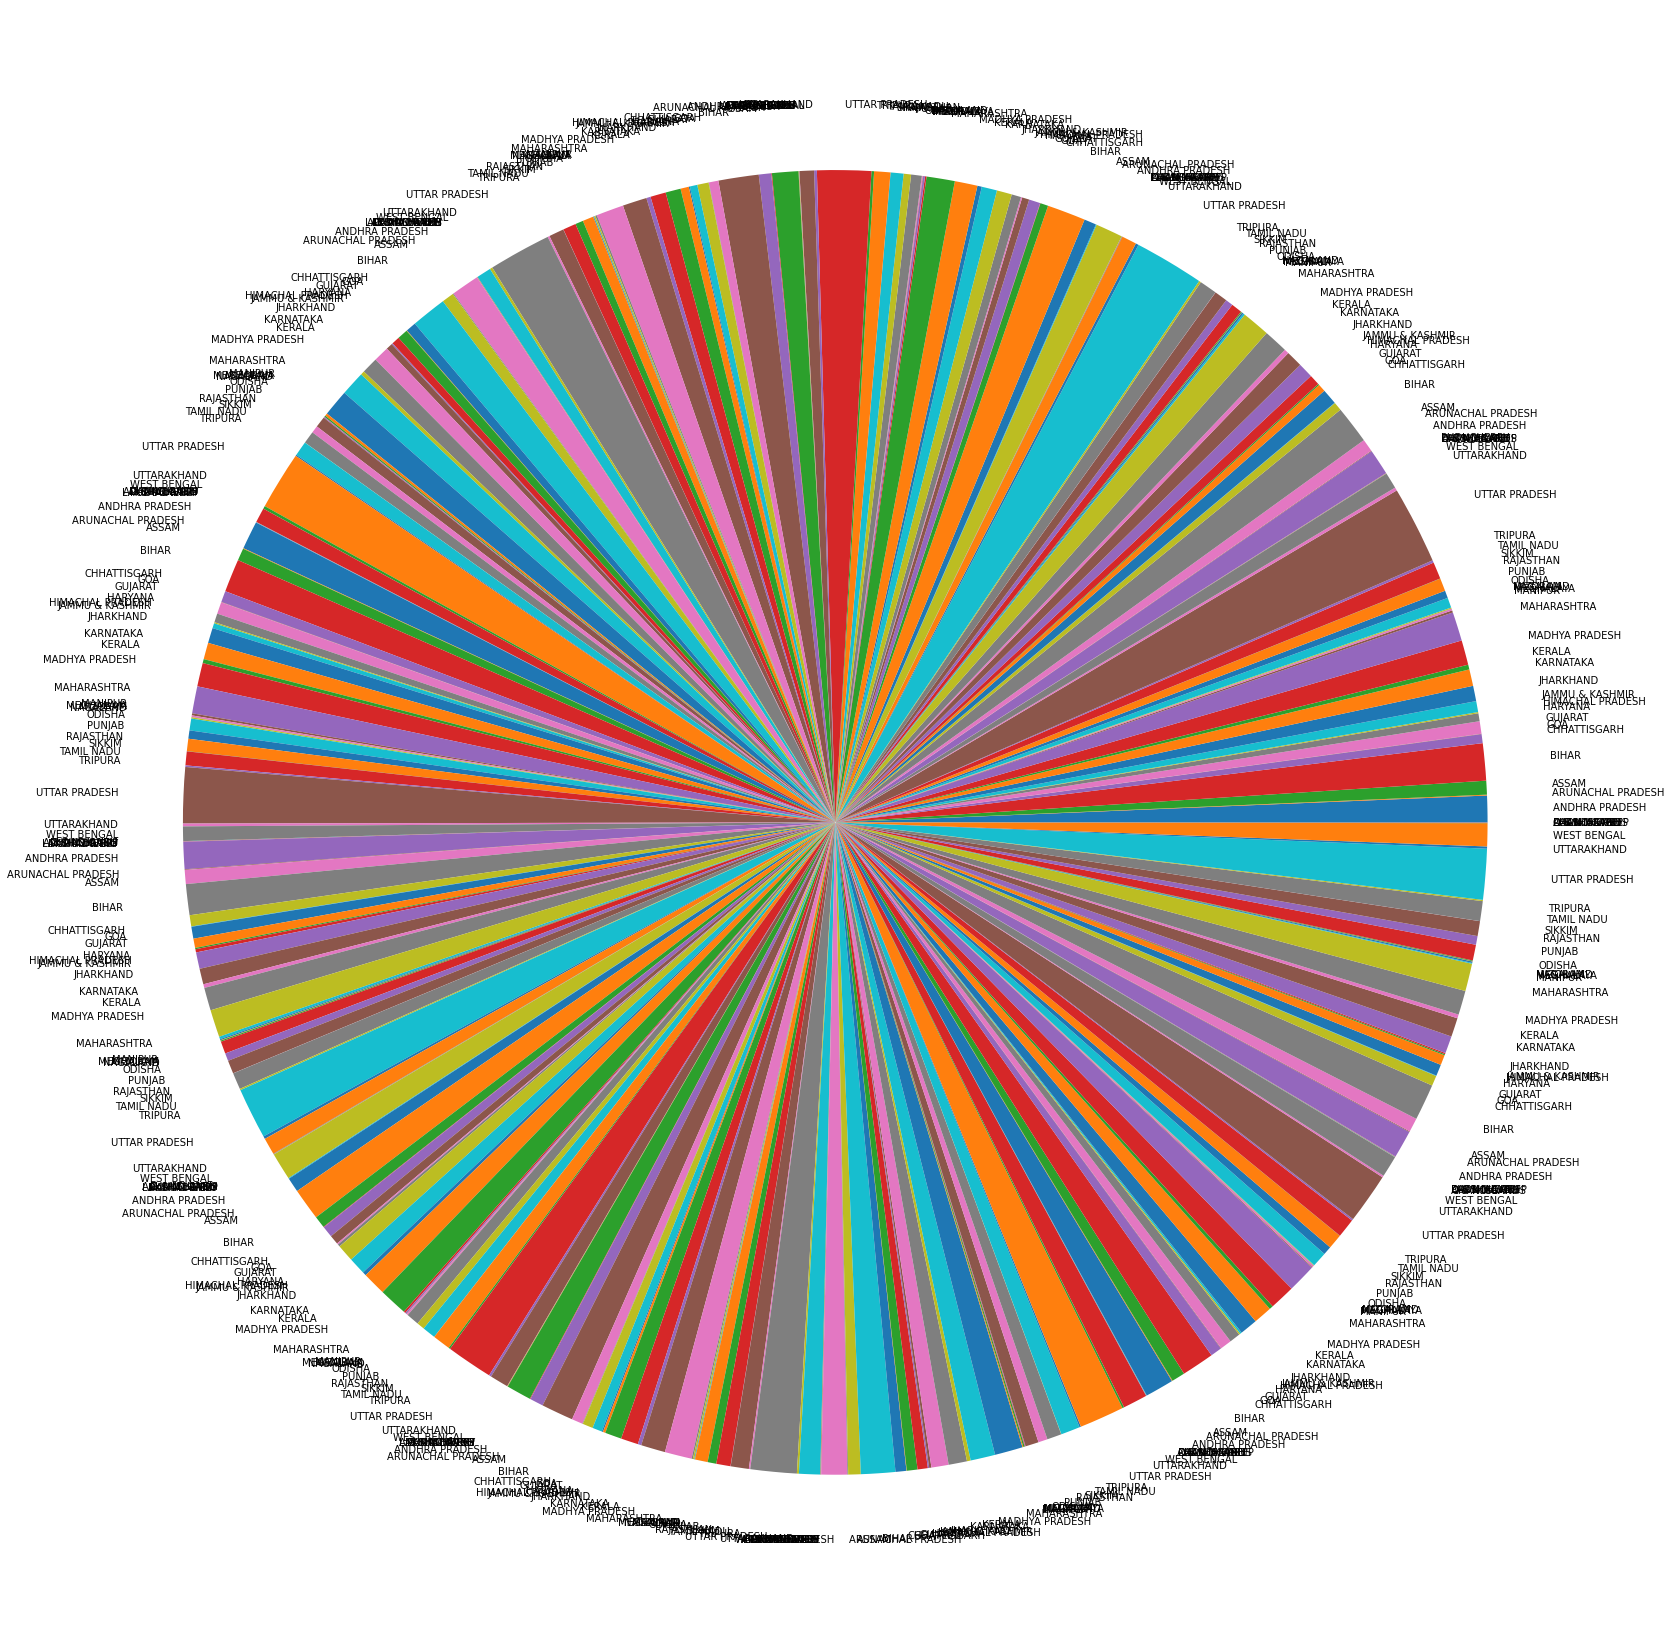

In [ ]:
plt.figure(figsize=(30,30))
plt.pie(state_data['MURDER'],labels= state_data['STATE/UT'])


In [ ]:
data.shape

(9017, 33)

In [ ]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
x = 'ODISHA'
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
data.shape

(9017, 33)

In [ ]:
df_x = data[data['DISTRICT']!='TOTAL']

In [ ]:
df_x.shape

(8609, 33)

In [ ]:
x = 'ODISHA'
df_x = df_x[df_x['STATE/UT']==x]

In [ ]:
df_x.shape

(418, 33)

In [ ]:
df_x = df_x[df_x['YEAR']==2010]

In [ ]:
df_x

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
7112,ODISHA,ANGUL,2010,61,59,0,39,0,39,42,...,13,28,13,253,5,68,0,145,1460,2901
7113,ODISHA,BALASORE,2010,53,40,0,48,0,48,75,...,28,1363,40,188,29,211,0,5,526,3330
7114,ODISHA,BARAGARH,2010,36,89,2,36,0,36,27,...,13,57,9,69,23,171,0,185,426,1627
7115,ODISHA,BERHAMPUR,2010,20,83,0,11,0,11,16,...,11,244,4,125,11,12,0,102,185,1251
7116,ODISHA,BHADRAK,2010,32,37,0,33,0,33,52,...,19,29,18,99,12,151,0,83,1154,2005
7117,ODISHA,BOLANGIR,2010,34,119,0,48,0,48,19,...,17,12,4,188,9,112,0,78,903,2021
7118,ODISHA,BOUDH,2010,11,14,0,7,0,7,7,...,8,60,2,35,2,21,0,16,107,360
7119,ODISHA,CUTTACK,2010,30,14,0,26,0,26,26,...,16,233,22,26,1,107,0,106,1336,2340
7120,ODISHA,DCP BBSR,2010,44,56,2,43,0,43,41,...,10,712,18,45,8,41,0,176,1251,4096
7121,ODISHA,DCP CTC,2010,19,12,6,17,0,17,31,...,5,26,4,18,3,84,0,98,1119,2226


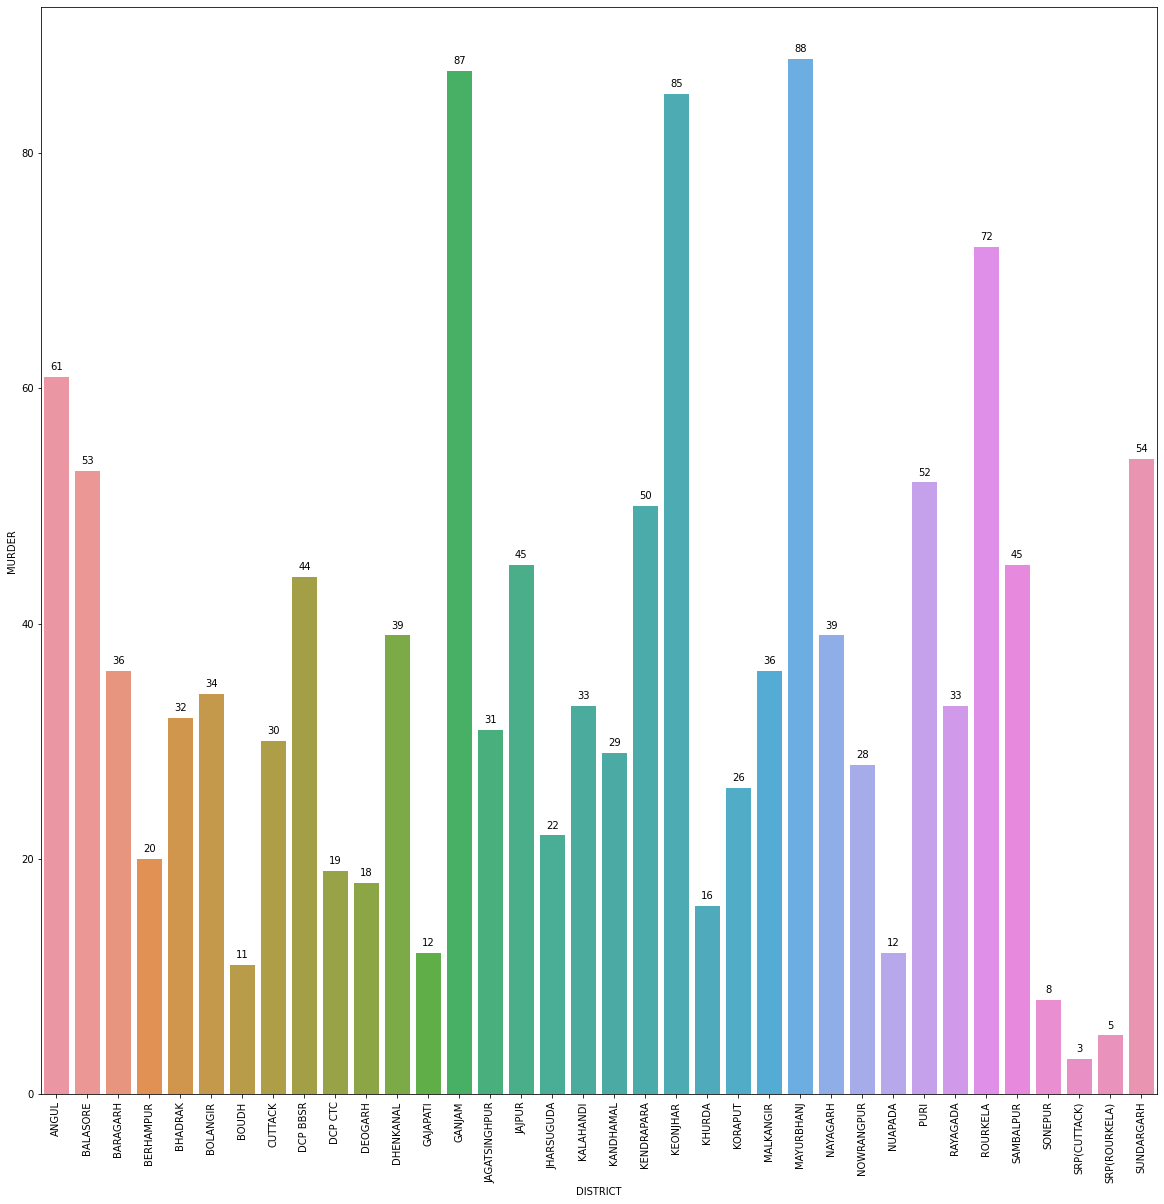

In [ ]:
plt.figure(figsize=(20,20))
splot = sns.barplot(x = 'DISTRICT',y = 'MURDER',data = df_x)
for p in splot.patches:
  splot.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 49.4 MB/s 
     |████████████████████████████████| 16.7 MB 439 kB/s 


In [ ]:
import geopandas as gpd

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
shp_gdf = gpd.read_file('India_State_Boundary.shp')

In [ ]:
shp_gdf

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [ ]:
state_data = state_data[state_data['YEAR']==2010]

In [ ]:
state_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,ANDHRA PRADESH,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,ARUNACHAL PRADESH,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,ASSAM,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,BIHAR,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,CHHATTISGARH,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,GOA,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,GUJARAT,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,HARYANA,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,HIMACHAL PRADESH,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,JAMMU & KASHMIR,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data = state_data.copy()

In [ ]:
map_data['STATE/UT'] = state_data['STATE/UT'].apply(lambda x : x.lower())

In [ ]:
map_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,andhra pradesh,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,arunachal pradesh,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,assam,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,bihar,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,chhattisgarh,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,goa,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,gujarat,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,haryana,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,himachal pradesh,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,jammu & kashmir,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data.loc[:,['STATE/UT','MURDER','RAPE','KIDNAPPING & ABDUCTION']]

,STATE/UT,MURDER,RAPE,KIDNAPPING & ABDUCTION
6669,andhra pradesh,2538,1362,2053
6687,arunachal pradesh,75,47,67
6718,assam,1223,1721,3250
6763,bihar,3362,795,3674
6785,chhattisgarh,1065,1012,359
6788,goa,35,36,25
6821,gujarat,1048,408,1447
6844,haryana,1005,720,963
6860,himachal pradesh,132,160,194
6890,jammu & kashmir,217,245,896


In [ ]:
shp_gdf

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [ ]:
map_data['STATE/UT'] = map_data['STATE/UT'].apply(lambda x : x.capitalize())

In [ ]:
map_data.iloc[0,0] = 'Andhra Pradesh'

In [ ]:
map_data.iloc[1,0] = 'Arunachal Pradesh'

In [ ]:
map_data.loc[6785,'STATE/UT'] = 'Chhattishgarh'

In [ ]:
map_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,Andhra Pradesh,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,Arunachal Pradesh,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,Assam,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,Bihar,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,Chhattishgarh,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,Goa,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,Gujarat,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,Haryana,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,Himachal pradesh,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,Jammu & kashmir,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data.loc[6860,'STATE/UT'] = 'Himachal Pradesh'

In [ ]:
map_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,Andhra Pradesh,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,Arunachal Pradesh,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,Assam,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,Bihar,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,Chhattishgarh,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,Goa,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,Gujarat,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,Haryana,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,Himachal Pradesh,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,Jammu & kashmir,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data.loc[6890,'STATE/UT'] = 'Jammu and Kashmir'

In [ ]:
map_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,Andhra Pradesh,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,Arunachal Pradesh,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,Assam,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,Bihar,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,Chhattishgarh,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,Goa,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,Gujarat,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,Haryana,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,Himachal Pradesh,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,Jammu and Kashmir,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data.loc[7025,'STATE/UT'] = 'Madhya Pradesh'

In [ ]:
map_data.loc[7262,'STATE/UT'] = 'Tamilnadu'

In [ ]:
map_data.loc[7342,'STATE/UT'] = 'Uttar Pradesh'

In [ ]:
map_data.loc[7381,'STATE/UT'] = 'West Bengal'

In [ ]:
map_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6669,Andhra Pradesh,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6687,Arunachal Pradesh,TOTAL,2010,75,34,3,47,0,47,67,...,28,439,0,84,1,12,0,106,622,2439
6718,Assam,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,Bihar,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6785,Chhattishgarh,TOTAL,2010,1065,756,30,1012,0,1012,359,...,319,10188,115,1706,182,861,2,2907,23091,54958
6788,Goa,TOTAL,2010,35,27,3,36,0,36,25,...,23,177,1,36,16,17,0,256,927,3293
6821,Gujarat,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6844,Haryana,TOTAL,2010,1005,836,63,720,0,720,963,...,221,3733,284,476,580,2720,0,1595,20060,59120
6860,Himachal Pradesh,TOTAL,2010,132,74,12,160,0,160,194,...,127,1374,2,350,78,275,0,610,7020,13049
6890,Jammu and Kashmir,TOTAL,2010,217,711,26,245,0,245,896,...,224,278,9,1038,262,211,0,494,11869,23223


In [ ]:
map_data.loc[7384,'STATE/UT'] = 'Andaman & Nicobar'

In [ ]:
map_data = map_data.loc[:,['STATE/UT','MURDER','RAPE','KIDNAPPING & ABDUCTION']]

In [ ]:
map_data

,STATE/UT,MURDER,RAPE,KIDNAPPING & ABDUCTION
6669,Andhra Pradesh,2538,1362,2053
6687,Arunachal Pradesh,75,47,67
6718,Assam,1223,1721,3250
6763,Bihar,3362,795,3674
6785,Chhattishgarh,1065,1012,359
6788,Goa,35,36,25
6821,Gujarat,1048,408,1447
6844,Haryana,1005,720,963
6860,Himachal Pradesh,132,160,194
6890,Jammu and Kashmir,217,245,896


In [ ]:
shp_gdf

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [ ]:
merge =shp_gdf.set_index('State_Name').join(map_data.set_index('STATE/UT'))

In [ ]:
merge

,geometry,MURDER,RAPE,KIDNAPPING & ABDUCTION
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",9.0,24.0,10.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",2538.0,1362.0,2053.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",75.0,47.0,67.0
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",1223.0,1721.0,3250.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",3362.0,795.0,3674.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",21.0,31.0,38.0
Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",1065.0,1012.0,359.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",NaN,NaN,NaN
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",NaN,NaN,NaN
Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",35.0,36.0,25.0


In [ ]:
merge['MURDER'].fillna(merge['MURDER'].mean(),inplace = True)

In [ ]:
merge

,geometry,MURDER,RAPE,KIDNAPPING & ABDUCTION
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",9.00000,24.0,10.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",2538.00000,1362.0,2053.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",75.00000,47.0,67.0
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",1223.00000,1721.0,3250.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",3362.00000,795.0,3674.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",21.00000,31.0,38.0
Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",1065.00000,1012.0,359.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",993.69697,NaN,NaN
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",993.69697,NaN,NaN
Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",35.00000,36.0,25.0


In [ ]:
merge['MURDER'].fillna(merge['MURDER'].mean(),inplace = True)

In [ ]:
merge['RAPE'].fillna(merge['RAPE'].mean(),inplace = True)

In [ ]:
merge['KIDNAPPING & ABDUCTION'].fillna(merge['KIDNAPPING & ABDUCTION'].mean(),inplace = True)

In [ ]:
merge

,geometry,MURDER,RAPE,KIDNAPPING & ABDUCTION
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",9.00000,24.000000,10.000000
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",2538.00000,1362.000000,2053.000000
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",75.00000,47.000000,67.000000
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",1223.00000,1721.000000,3250.000000
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",3362.00000,795.000000,3674.000000
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",21.00000,31.000000,38.000000
Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",1065.00000,1012.000000,359.000000
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",993.69697,656.484848,1067.545455
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",993.69697,656.484848,1067.545455
Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",35.00000,36.000000,25.000000


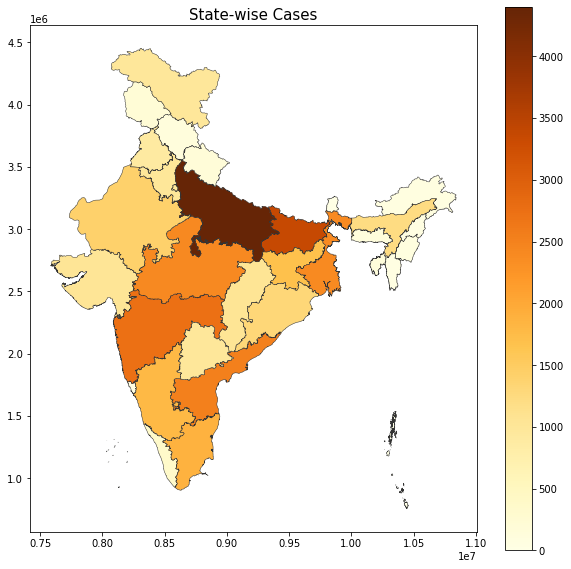

In [ ]:
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('State-wise Cases',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='MURDER', cmap='YlOrBr', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
merge.to_csv('mapss.csv')

In [ ]:
from google.colab import files

In [ ]:
files.download('mapss.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>